# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# (1) Data Exploration

In [2]:
data = pd.read_csv('spambase_remake.csv')

In [3]:
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
dictionary = []

📌 Email spam: yes=1, no=0.

In [5]:
# This is a method that can be called on a DataFrame object to display the first 5 rows of data.
data.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
# 5 randomly selected rows from the DataFrame.
data.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
2771,0.0,0.00,0.38,0.0,0.38,0.0,0.0,0.0,0.0,0.0,...,0.0,0.414,0.0,0.276,0.0,0.0,1.104,2,53,0
2885,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.764,6,30,0
637,0.0,0.64,1.29,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.053,0.0,0.531,0.0,0.0,4.337,121,334,1
2824,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.705,7,29,0
3307,0.0,0.00,2.94,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.505,0.0,0.0,2.375,4,19,0


In [7]:
# the number of rows and the number of columns in the DataFrame
data.shape

(4601, 58)

Our data includes 4601 e-mails (rows) and 58 features (columns). Its features are characterized as follows:

>word_freq_address - Percentage of words in the email that match the address.

>charfreq# - The percentage of characters in the email that match the symbol'#'.

>capital_run_length_average - Average length of uninterrupted capital letter sequences.

>capital_run_length_longest - Length of the longest continuous sequence of catipal letters.

>capital_run_length_total - Email's total number of capital letters.

In [8]:
# Display the information about a DataFrame,providing an overview of the DataFrame's structure.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [9]:
# Generate a statistical summary of a dataset
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


The stats seem to be fine, let us gain more undestanding by visualising the dataset.

# 2. Exploratory Data Analysis (EDA)

1.Identifying and Correcting Missing Values

In [10]:
# returns the number of missing values (null values) for each column in the dataset
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

The data doesn't have missing values

2.Checking the distribution of target Variable(Spam Column)

In [11]:
data['spam'].value_counts()
# retrieves the count of unique values in the 'spam' column

0    2788
1    1813
Name: spam, dtype: int64

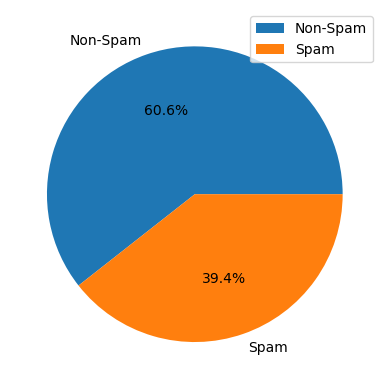

In [12]:
plt.pie(data['spam'].value_counts(),autopct="%1.1f%%",labels=['Non-Spam','Spam'])
plt.legend()
# creates a pie chart to show the proportion of unique values in the 'spam' column

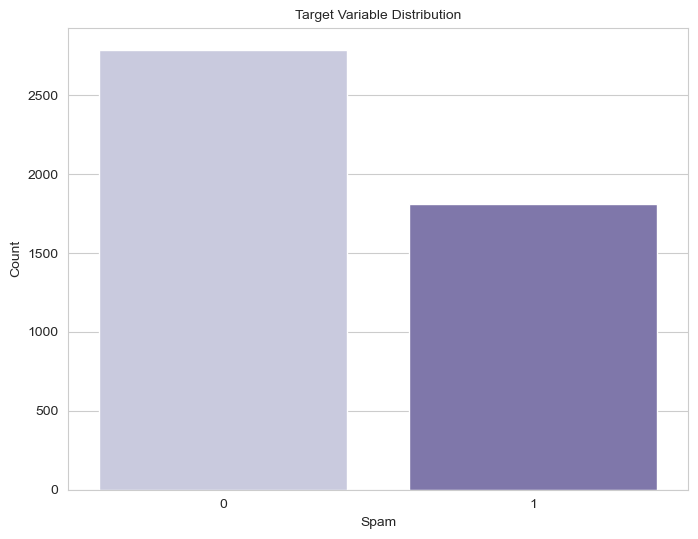

In [13]:
# visualize the distribution of the 'spam' column
sns.set_style("whitegrid") # Set the style of the plot
plt.figure(figsize=(8, 6)) # Set the figure size
sns.countplot(x=data["spam"], palette="Purples")
plt.title("Target Variable Distribution",fontsize=10)
plt.xlabel("Spam", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

There is a slight imbalance in the data.

3.Grouping the data based on the Spam(Target)

In [14]:
# group by the 'spam' column and calculate the mean
grouped_data = data.groupby('spam').mean()

# apply a color map to highlight the values
styled_data = grouped_data.style.background_gradient(cmap='coolwarm')

# display the styled data as a table
styled_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,0.021711,0.536324,0.061664,0.042403,0.008318,0.073587,0.048346,0.097292,1.270341,0.007579,0.438702,0.045226,0.007088,0.017138,0.895473,0.431994,1.265265,0.193806,0.162794,0.165854,0.106033,0.077306,0.150986,0.077787,0.169455,0.141671,0.197744,0.018723,0.121679,0.083117,0.072027,0.216808,0.070581,0.126636,0.415760,0.287184,0.008192,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,0.118434,0.549972,0.143547,0.083574,0.112079,0.518362,0.287507,0.319228,2.264539,0.205521,1.380370,0.238036,0.247055,0.212879,0.017479,0.009173,0.001550,0.018798,0.000684,0.005968,0.001274,0.000518,0.014562,0.001776,0.006928,0.029515,0.043469,0.004710,0.012427,0.036718,0.000055,0.002443,0.008450,0.006244,0.125091,0.014727,0.001219,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


We can clearly see that for most of the features, the mean values are higher for Spam(1) cases and lower for Non-spam(0) cases

4.distribution of each feature

In [15]:
# how each feature is distributed
for column in data.columns:
    print("Distribution of feature '{}':".format(column))
    print(data[column].describe())

Distribution of feature 'word_freq_make':
count    4601.000000
mean        0.104553
std         0.305358
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.540000
Name: word_freq_make, dtype: float64
Distribution of feature 'word_freq_address':
count    4601.000000
mean        0.213015
std         1.290575
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: word_freq_address, dtype: float64
Distribution of feature 'word_freq_all':
count    4601.000000
mean        0.280656
std         0.504143
min         0.000000
25%         0.000000
50%         0.000000
75%         0.420000
max         5.100000
Name: word_freq_all, dtype: float64
Distribution of feature 'word_freq_3d':
count    4601.000000
mean        0.065425
std         1.395151
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        42.810000
Name: word_freq_3d, dtype: float64
Distribution

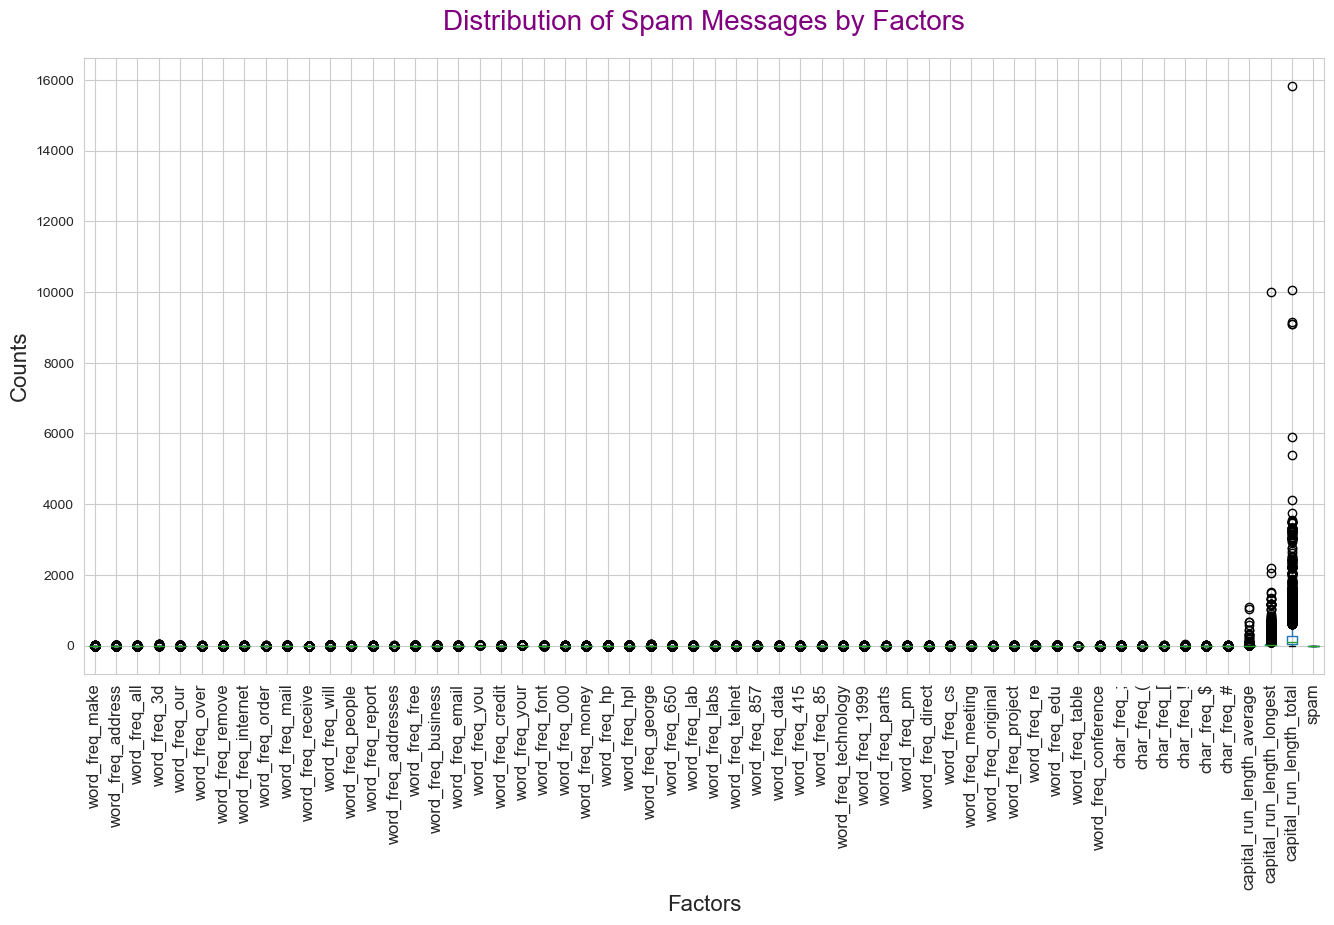

In [16]:
# boxplot to visualize the distribution of spam messages by factors
plt.figure(figsize = (16,8))
chart = data.boxplot()
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90, fontsize=12)
plt.title('Distribution of Spam Messages by Factors', fontsize=20, pad=20, color='purple')
plt.xlabel('Factors', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

5.Visualize each feature's distribution.

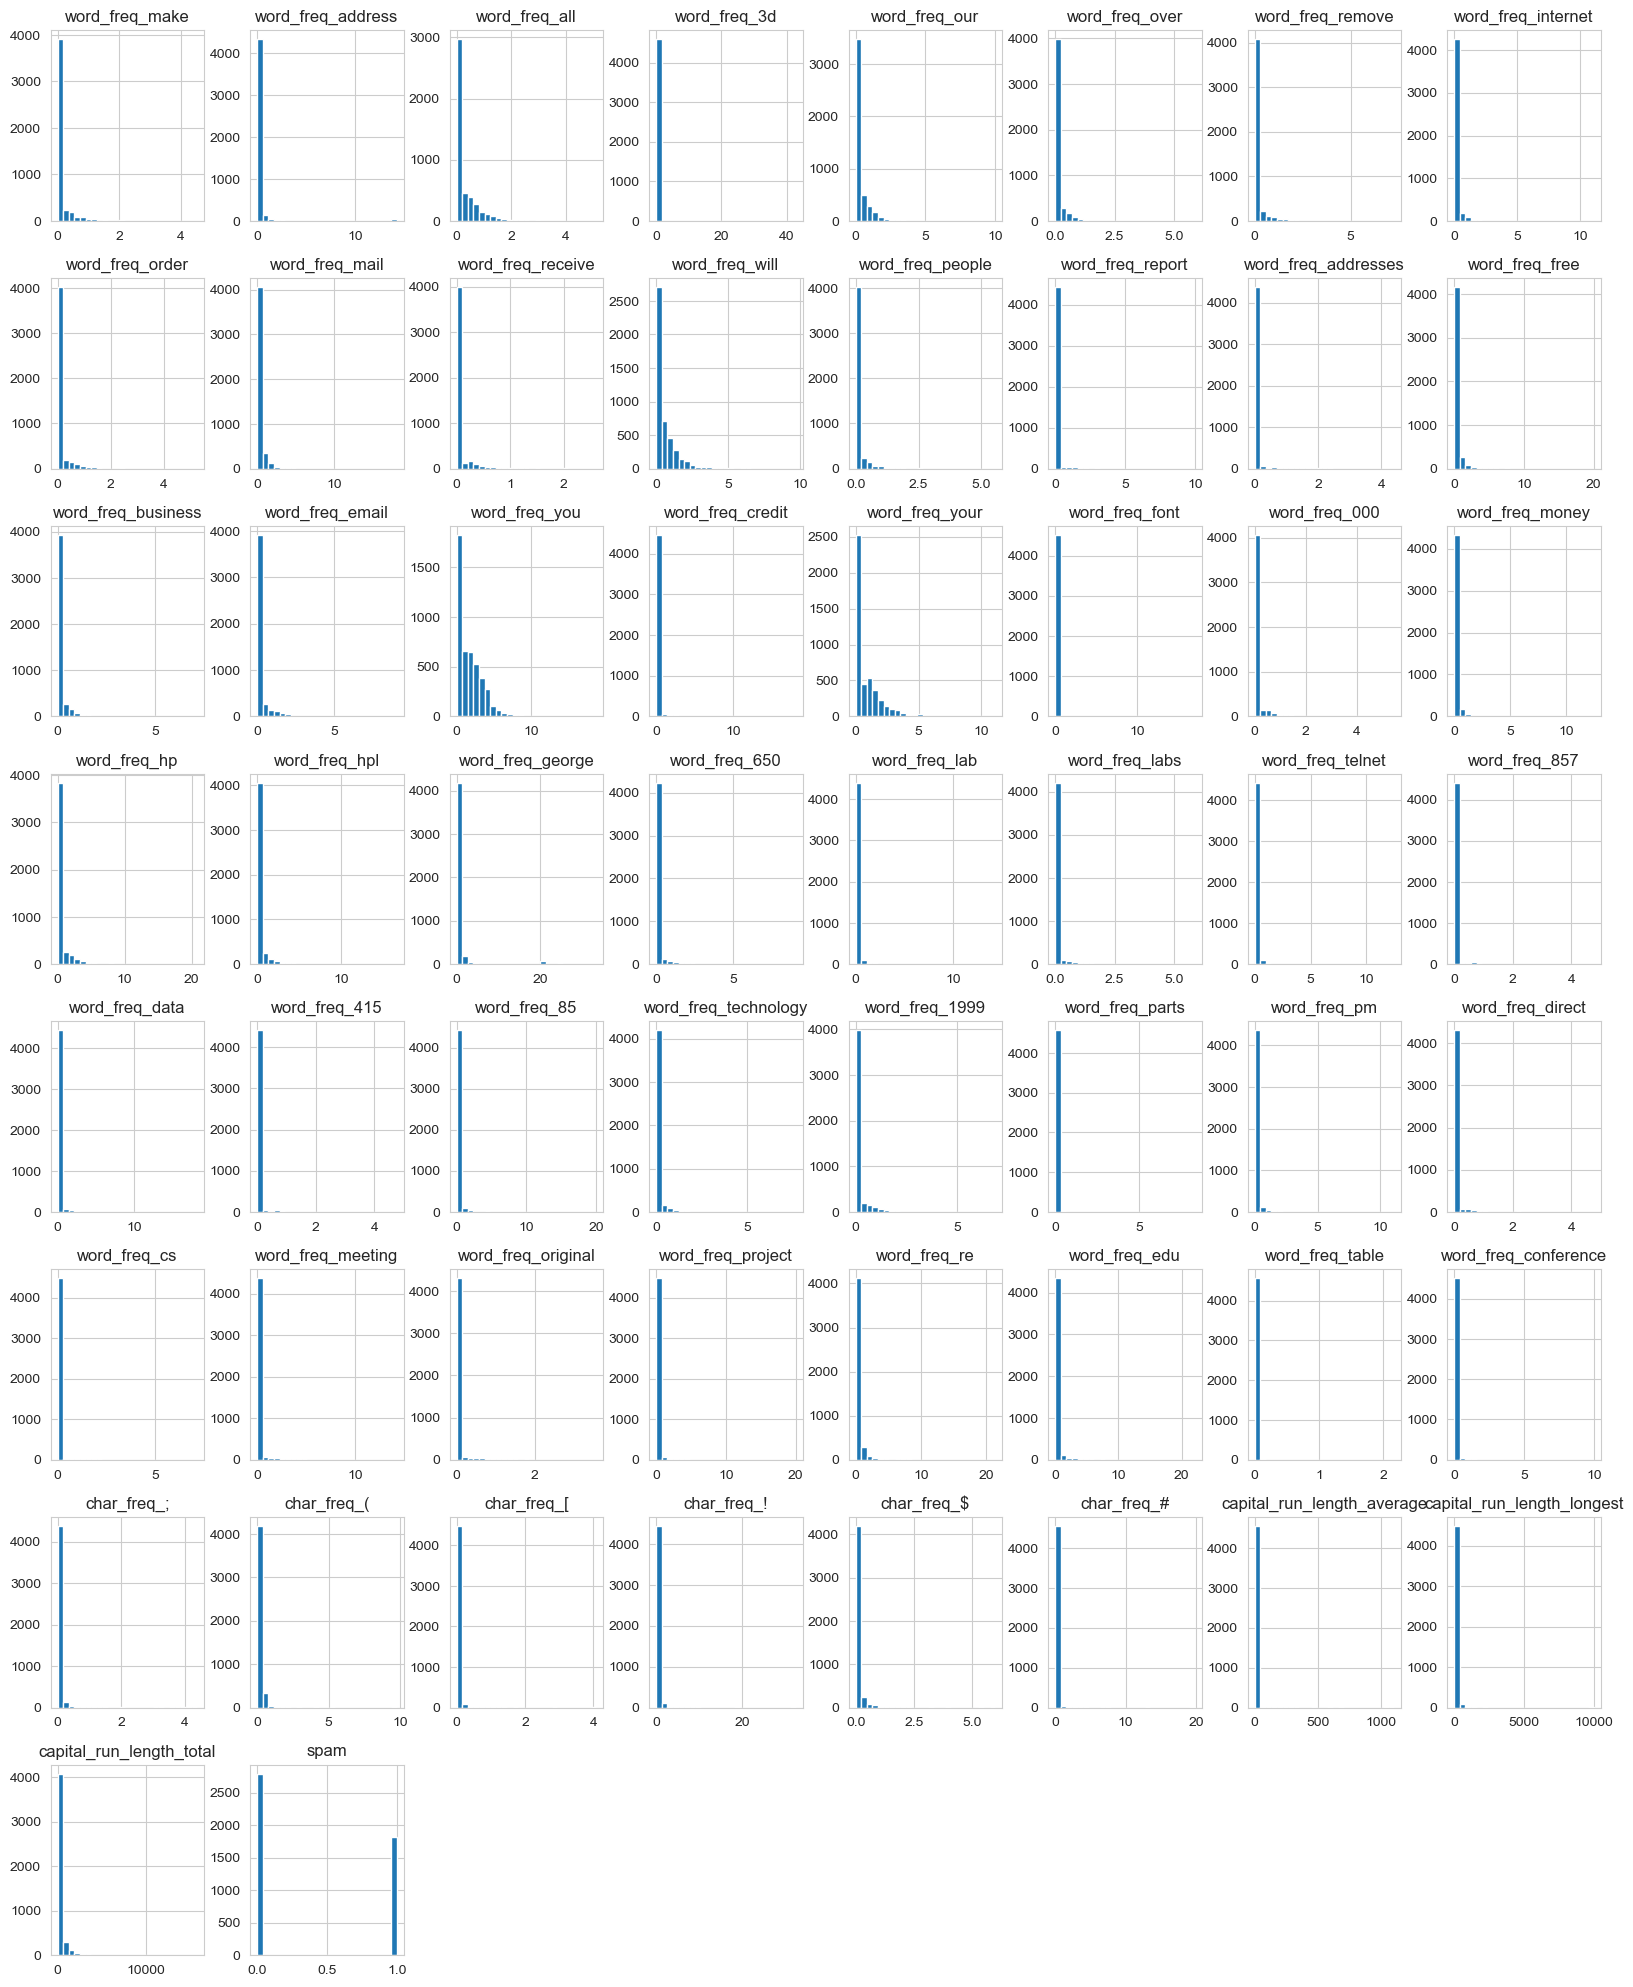

In [17]:
#histograms to visualize the distribution of each feature
data.hist(figsize=(20,25), bins=25)
plt.show()

6.detecting Outliers

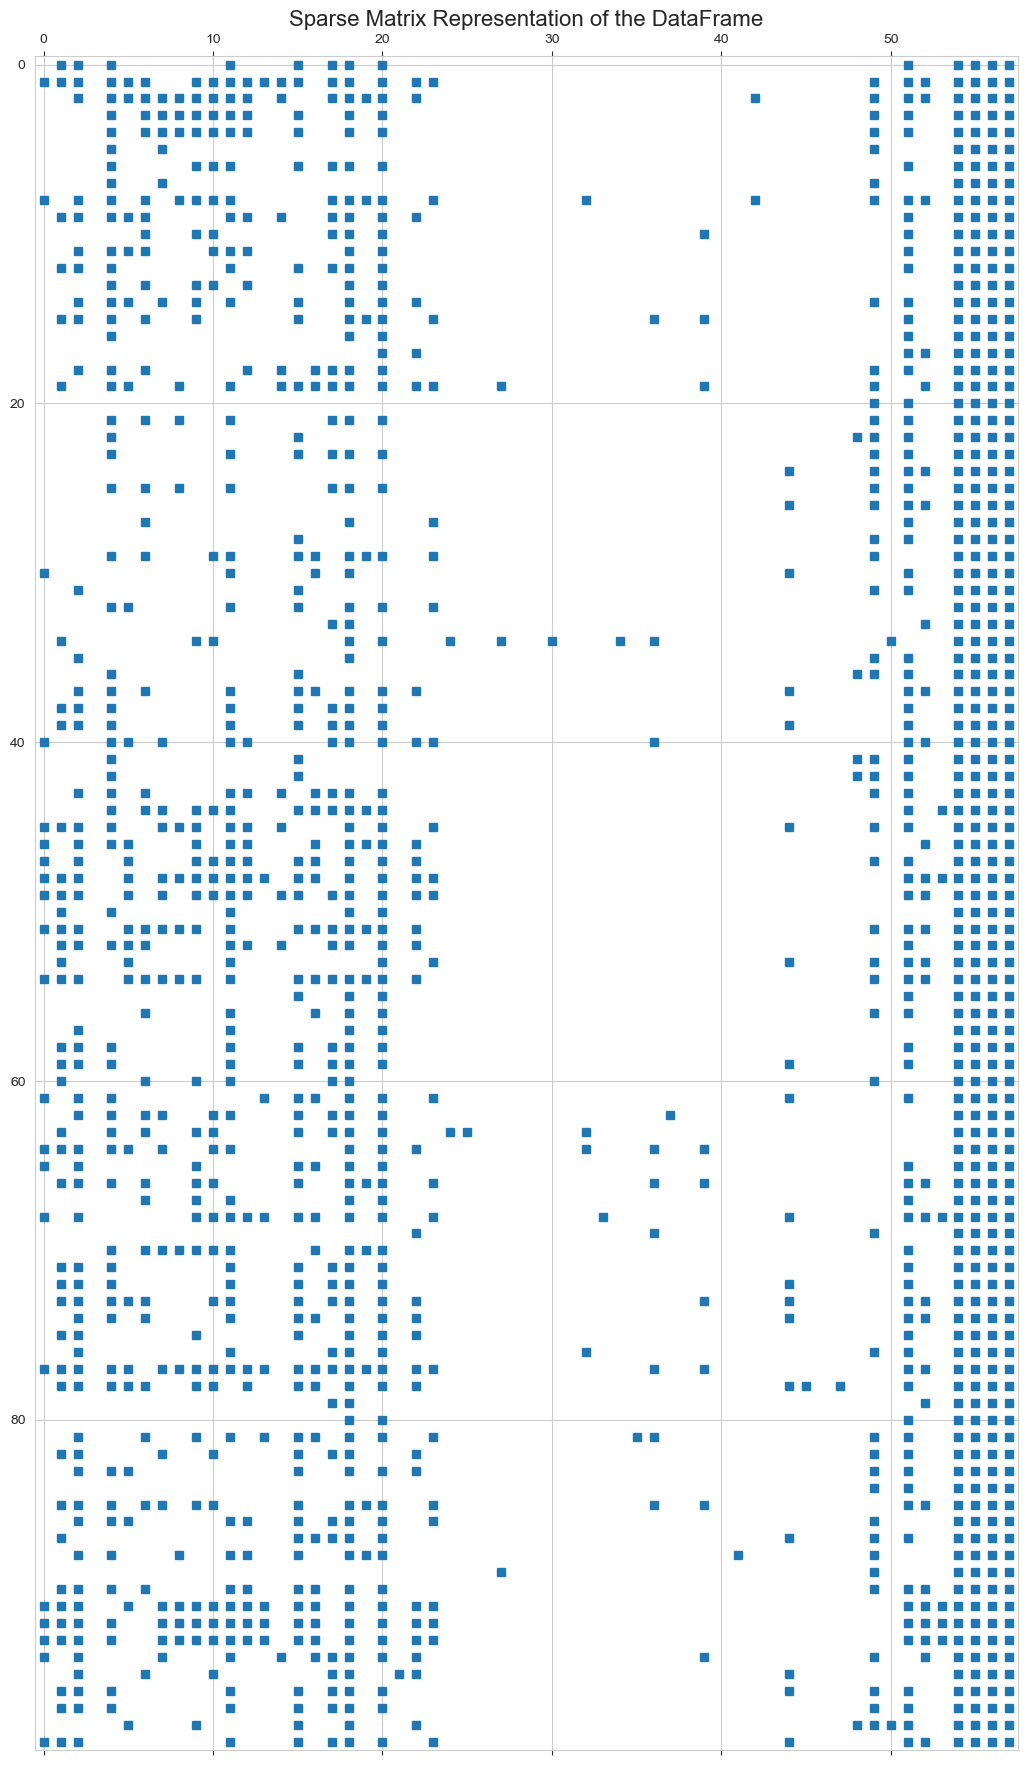

In [18]:
#Plotting Sparse Matrix
plt.figure(figsize=[16, 22]) # Set the figure size
plt.title("Sparse Matrix Representation of the DataFrame", fontsize=16) # Set the title and font size
plt.spy(data[:100].values, precision=0.1, markersize=6)
plt.show()

C:\Users\theekshana\AppData\Local\Temp\ipykernel_3800\1698767592.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


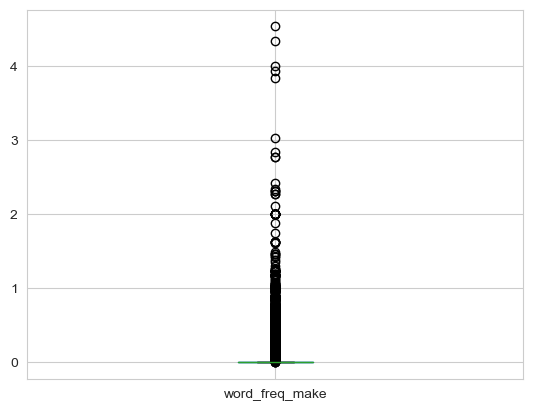

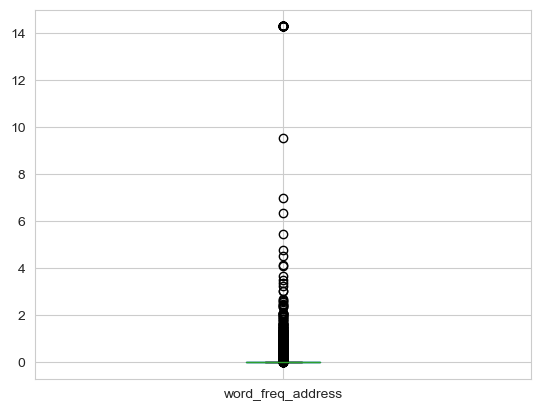

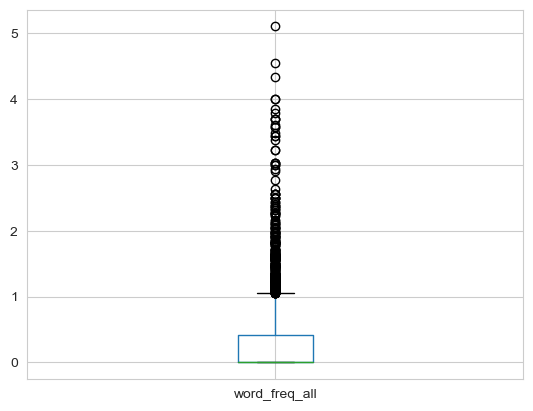

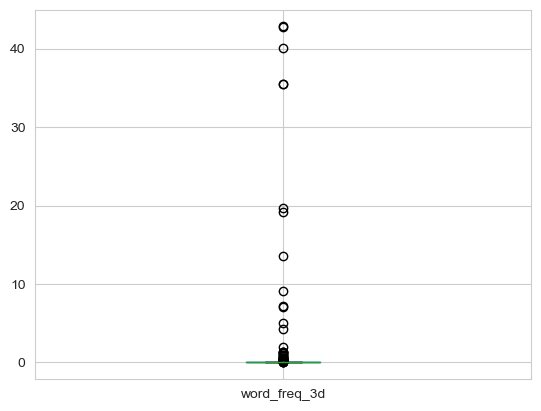

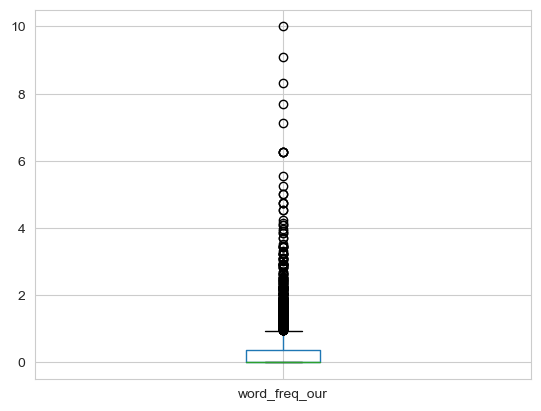

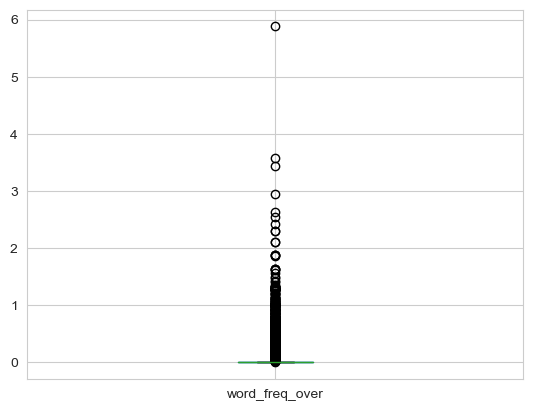

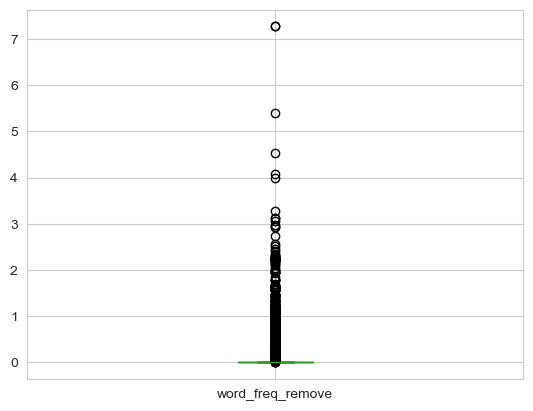

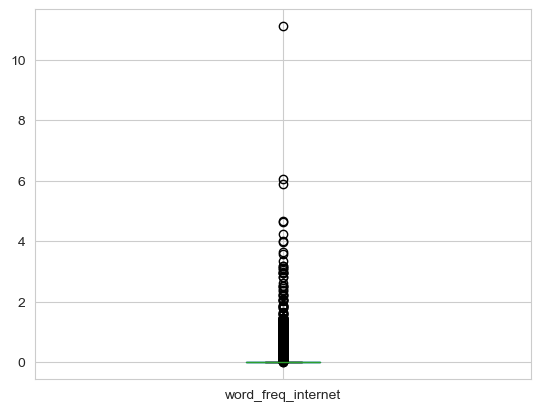

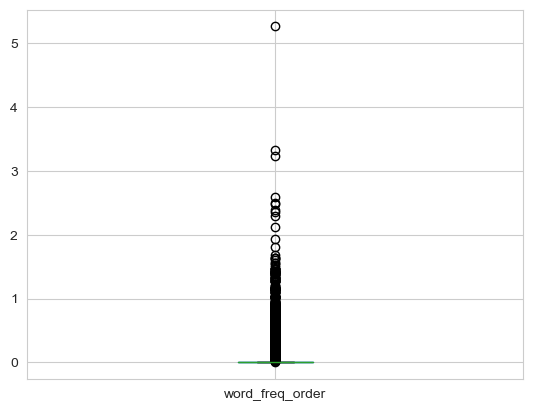

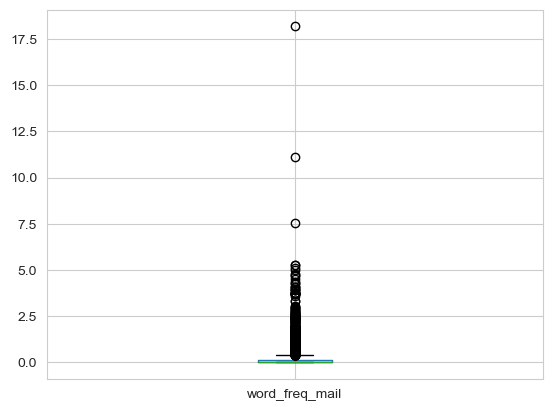

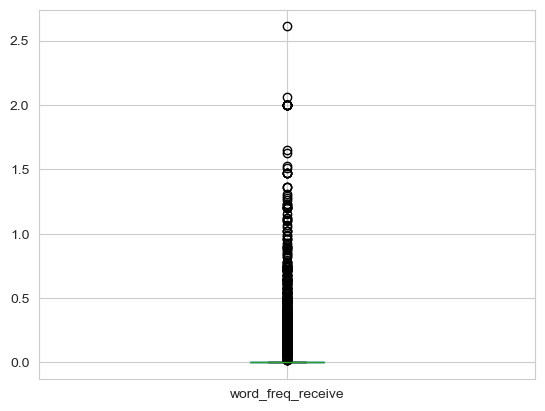

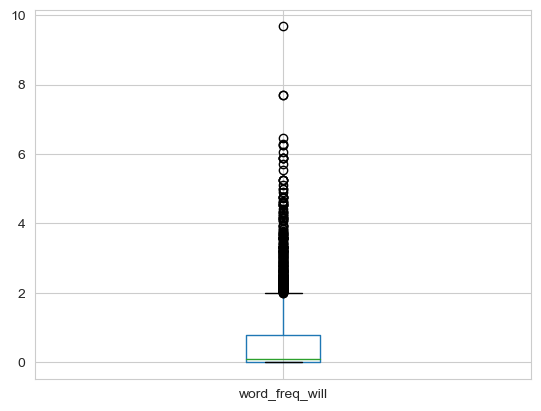

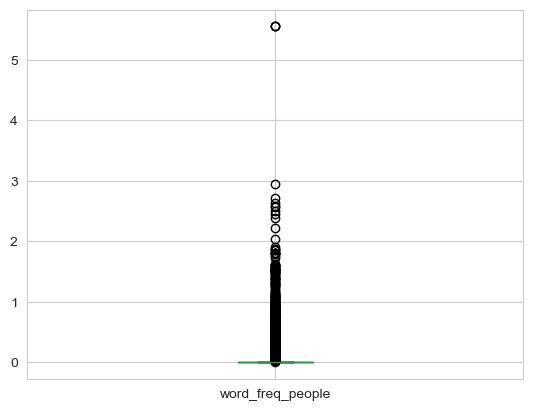

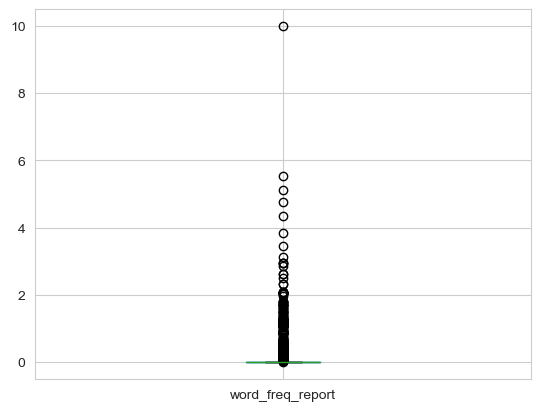

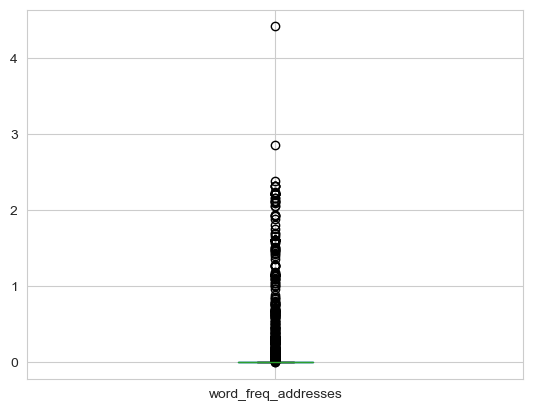

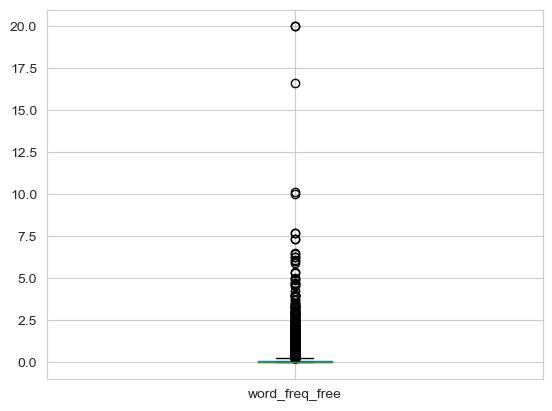

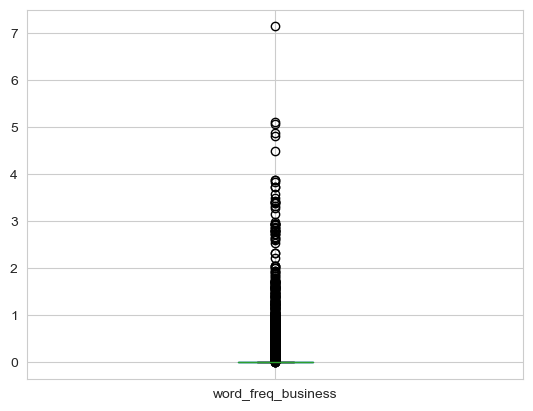

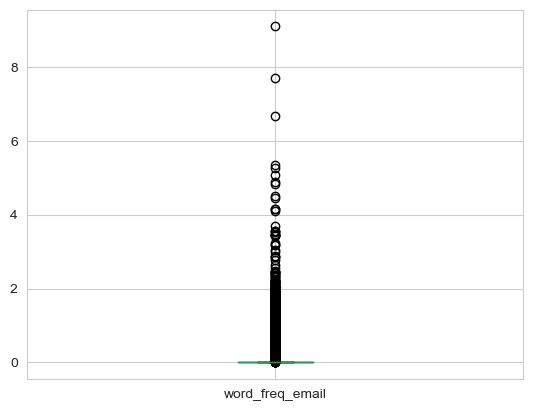

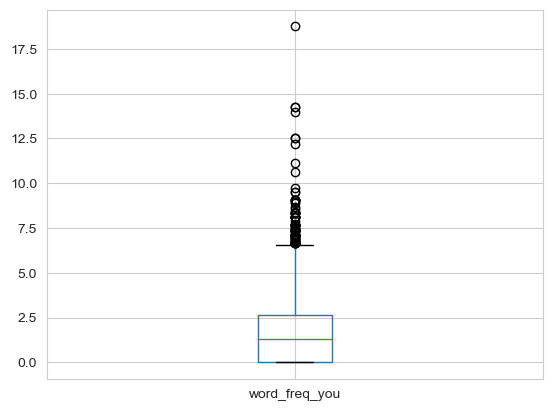

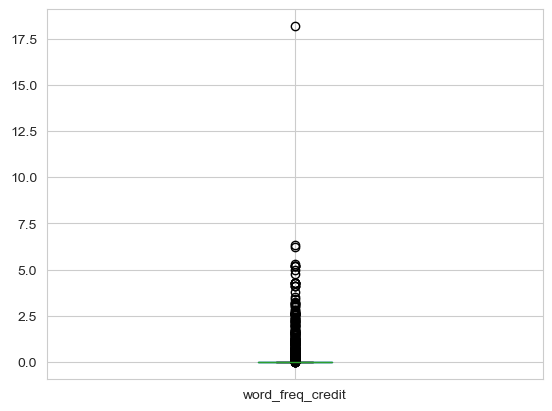

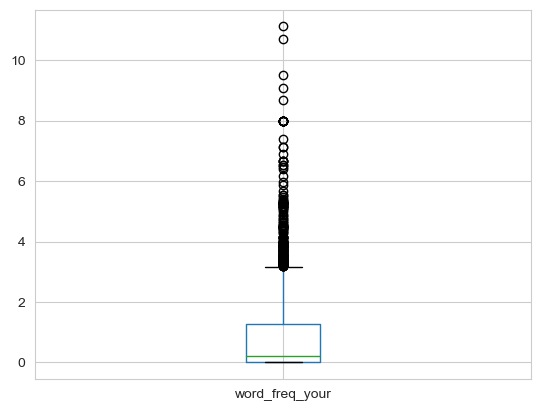

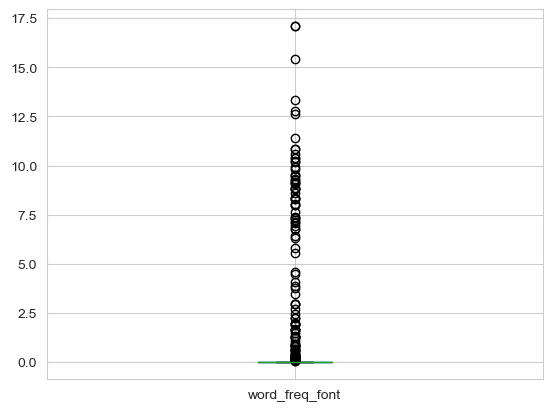

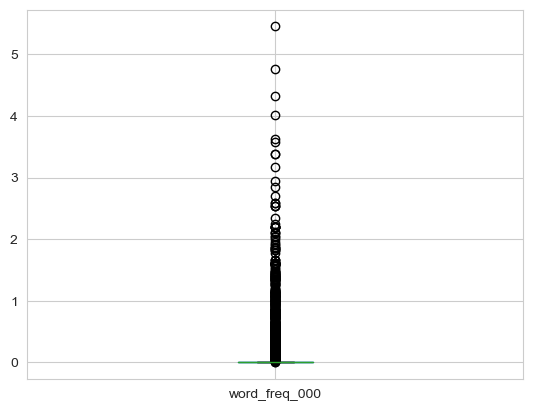

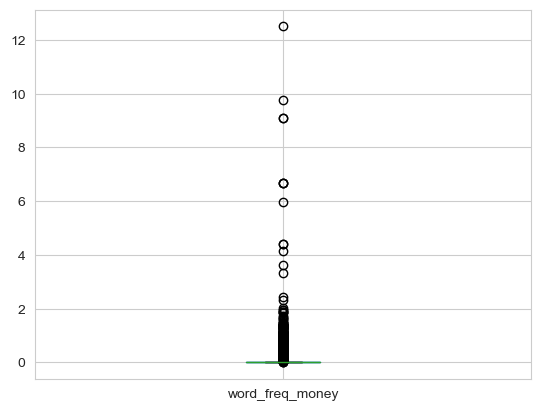

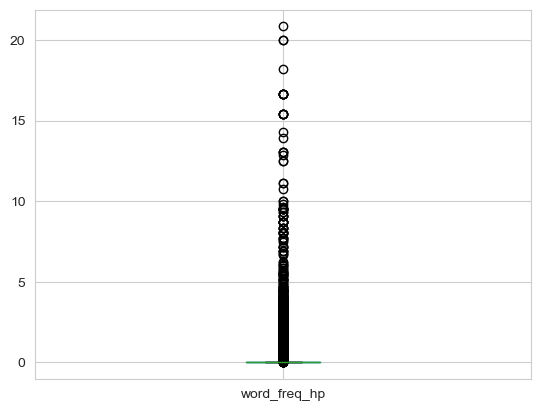

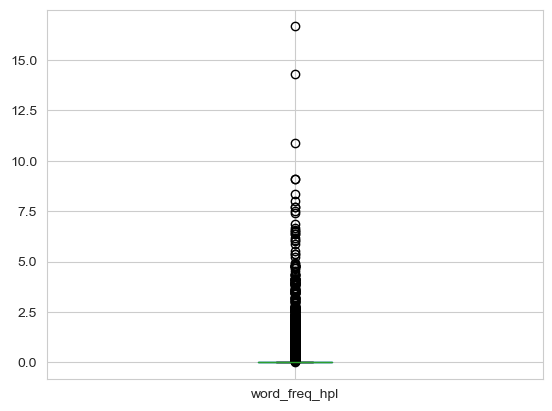

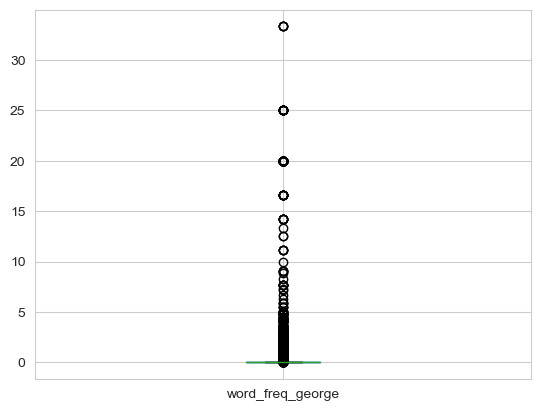

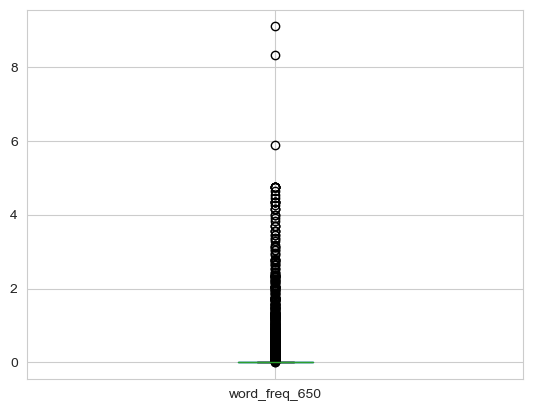

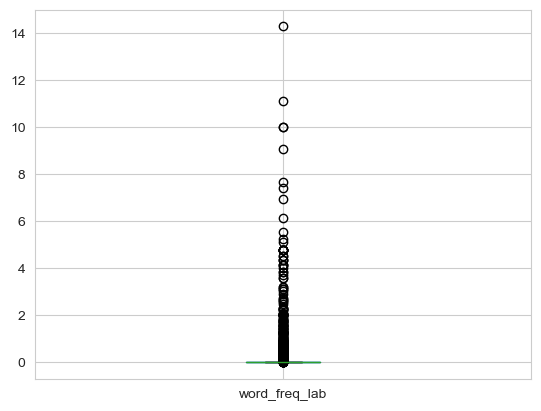

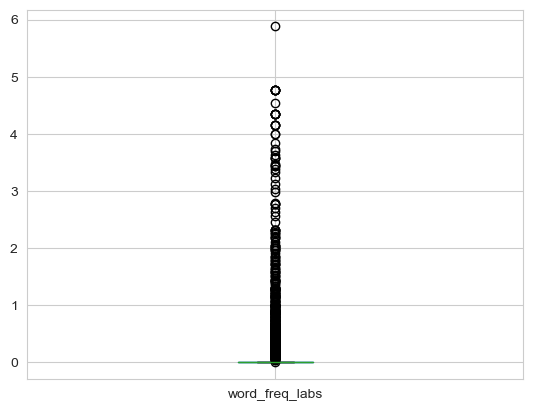

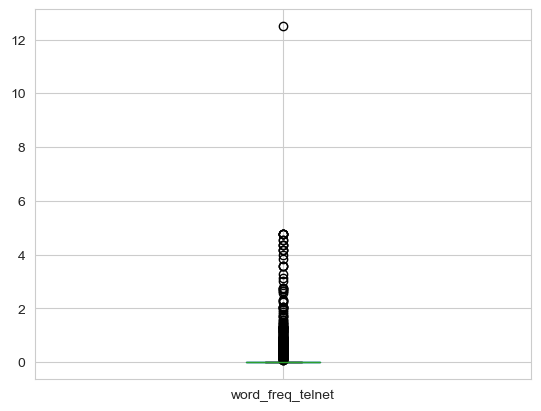

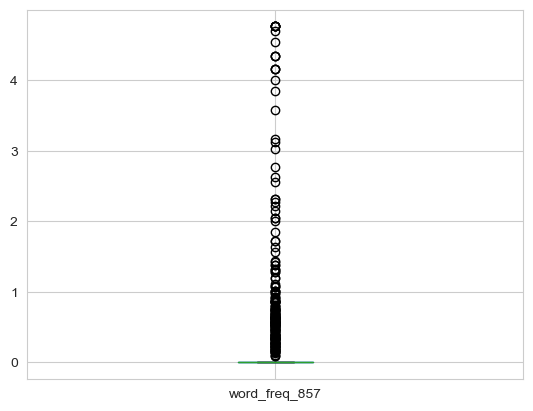

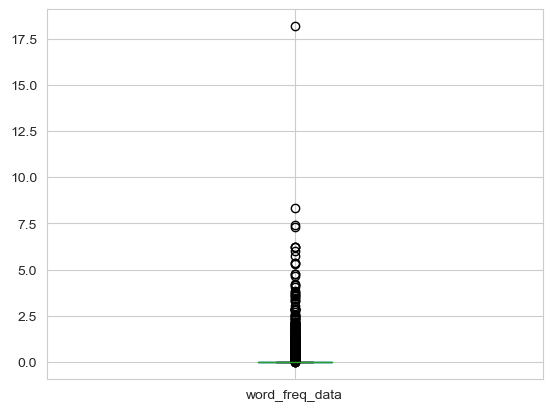

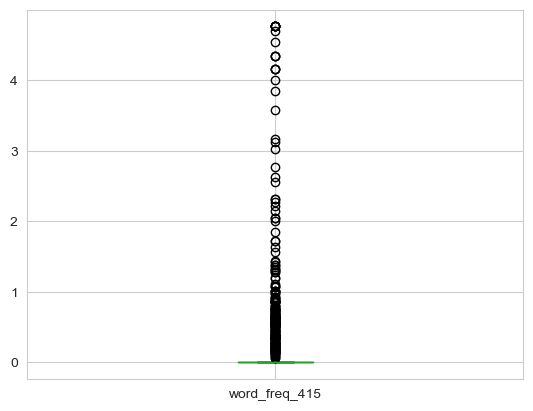

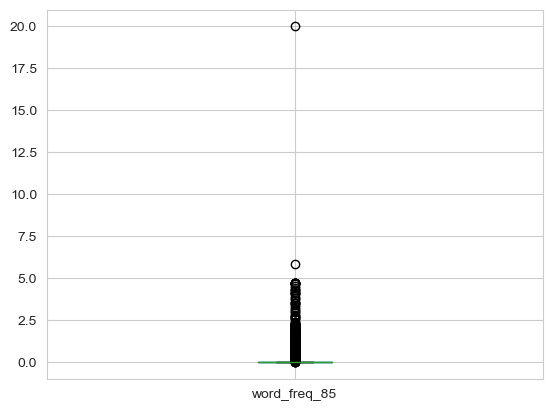

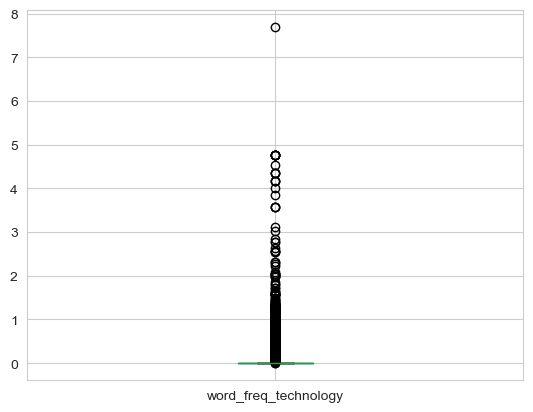

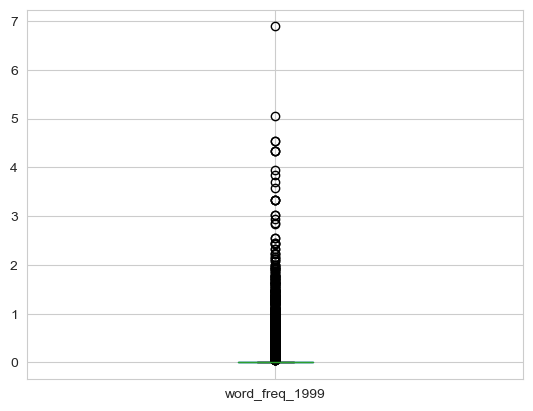

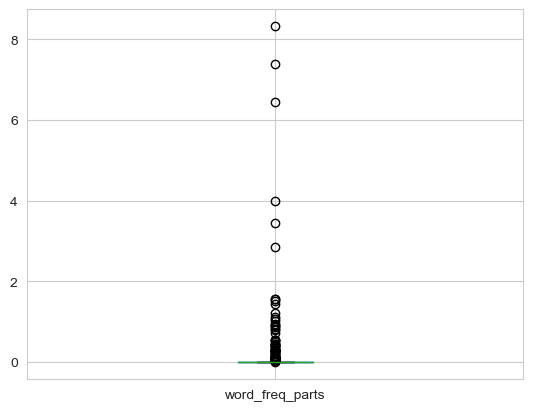

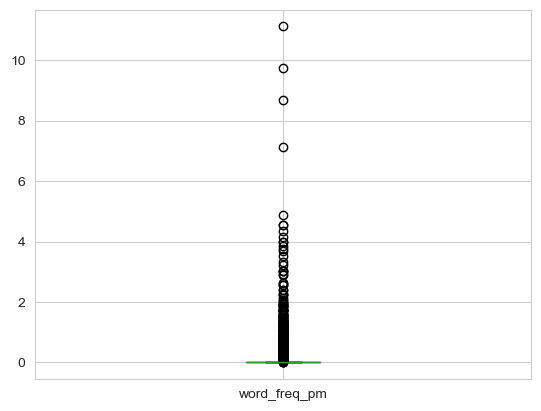

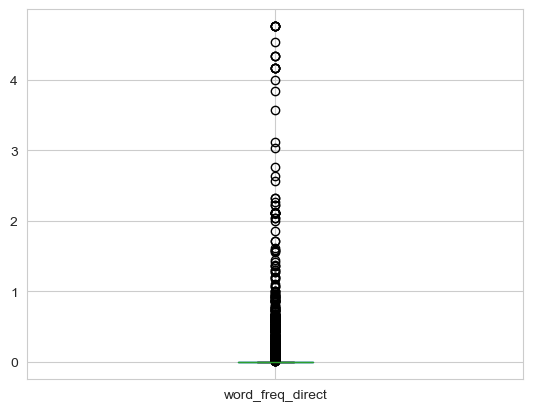

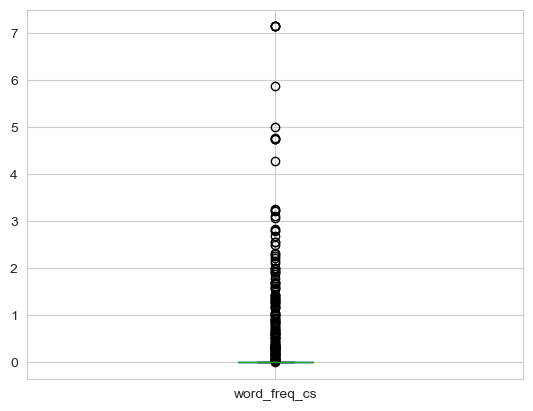

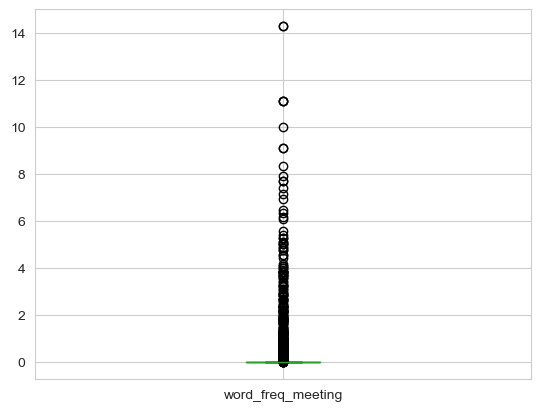

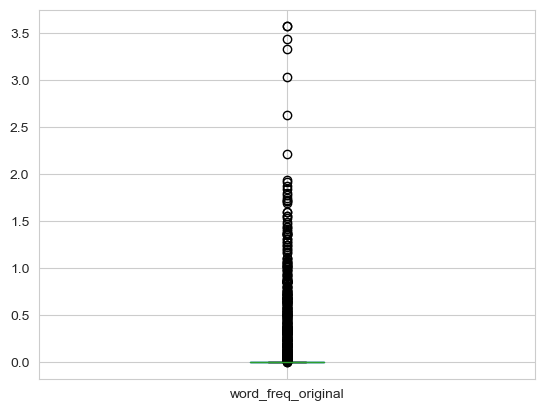

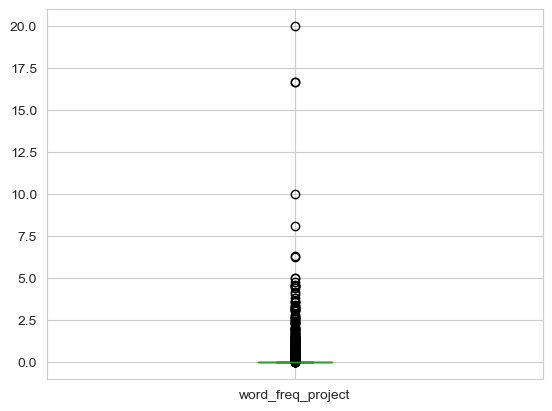

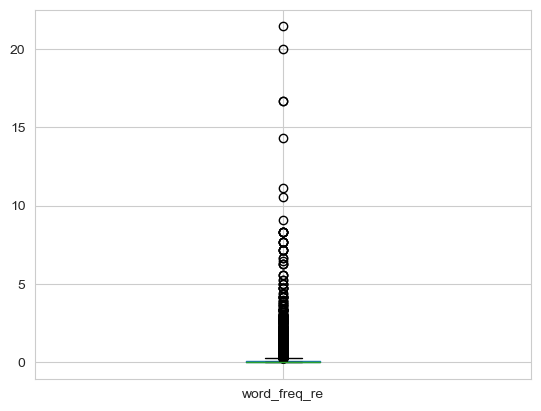

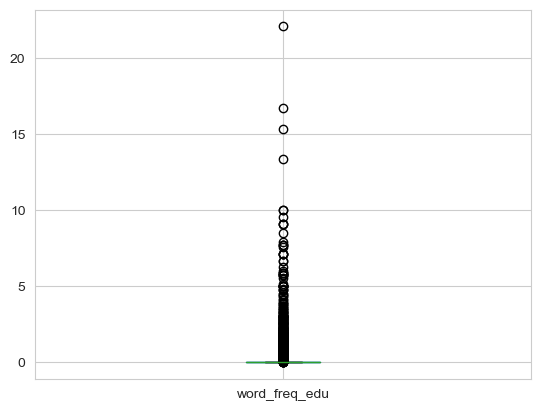

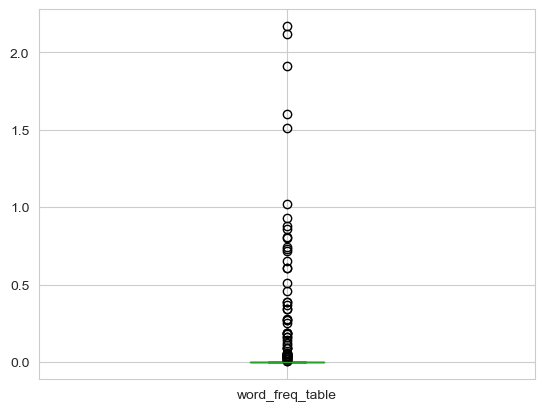

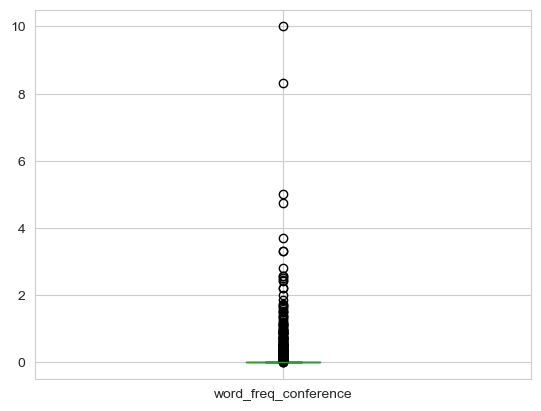

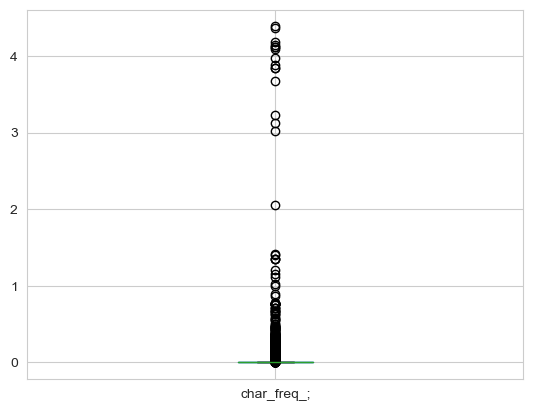

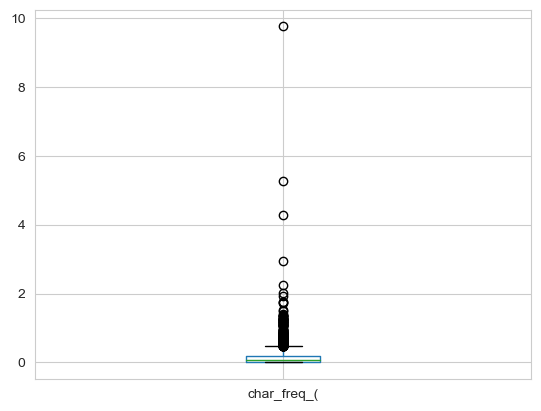

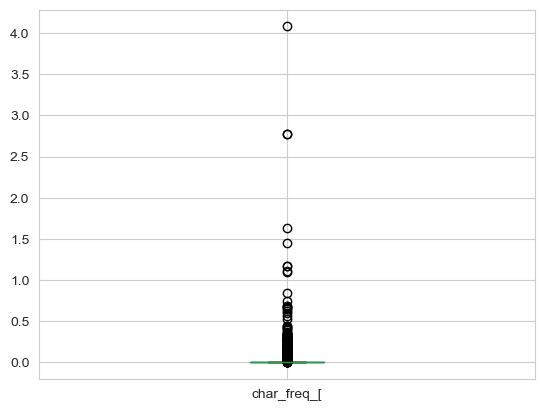

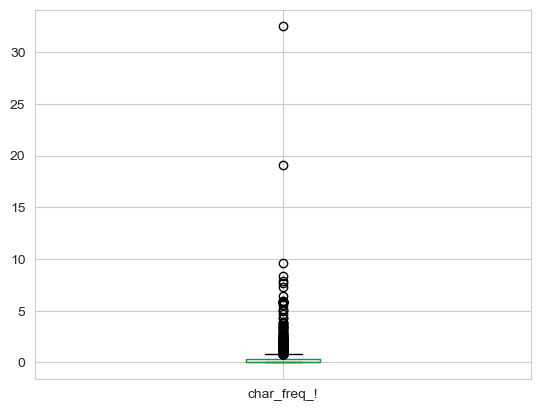

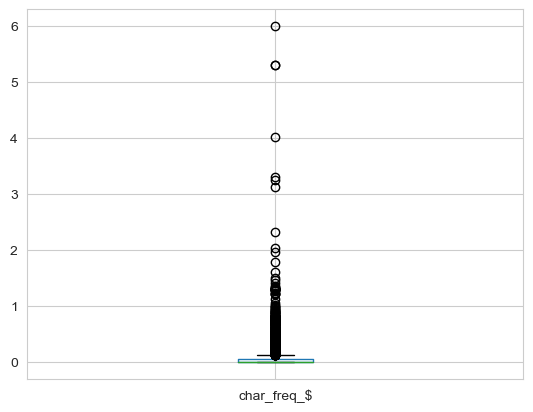

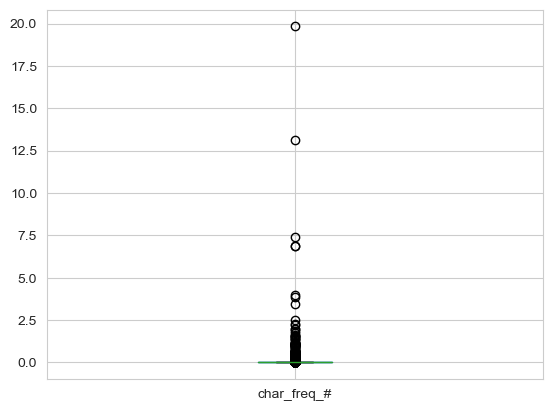

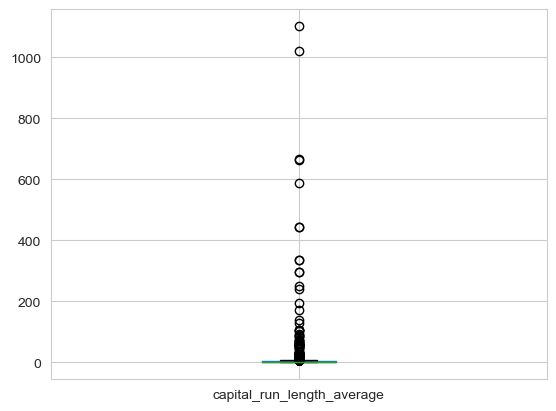

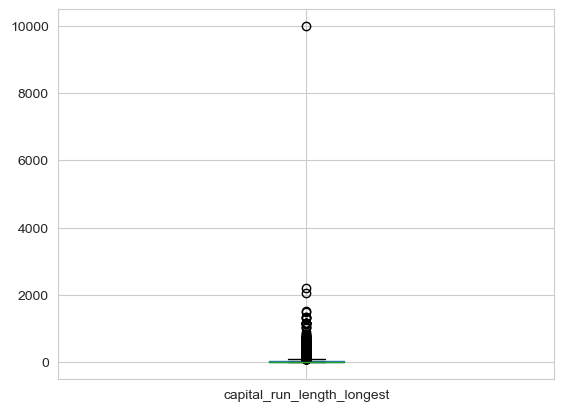

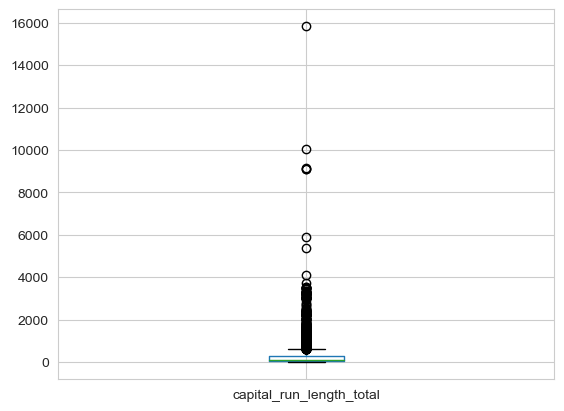

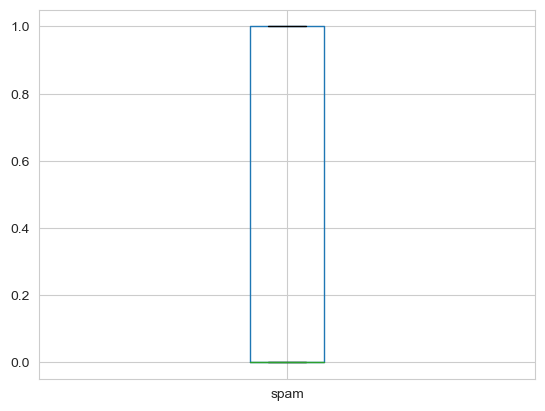

In [19]:
for column in data:
    plt.figure()
    data.boxplot([column])

As we can see, the majority of the skewed features have Outliers.

7. Checking correlation between the features

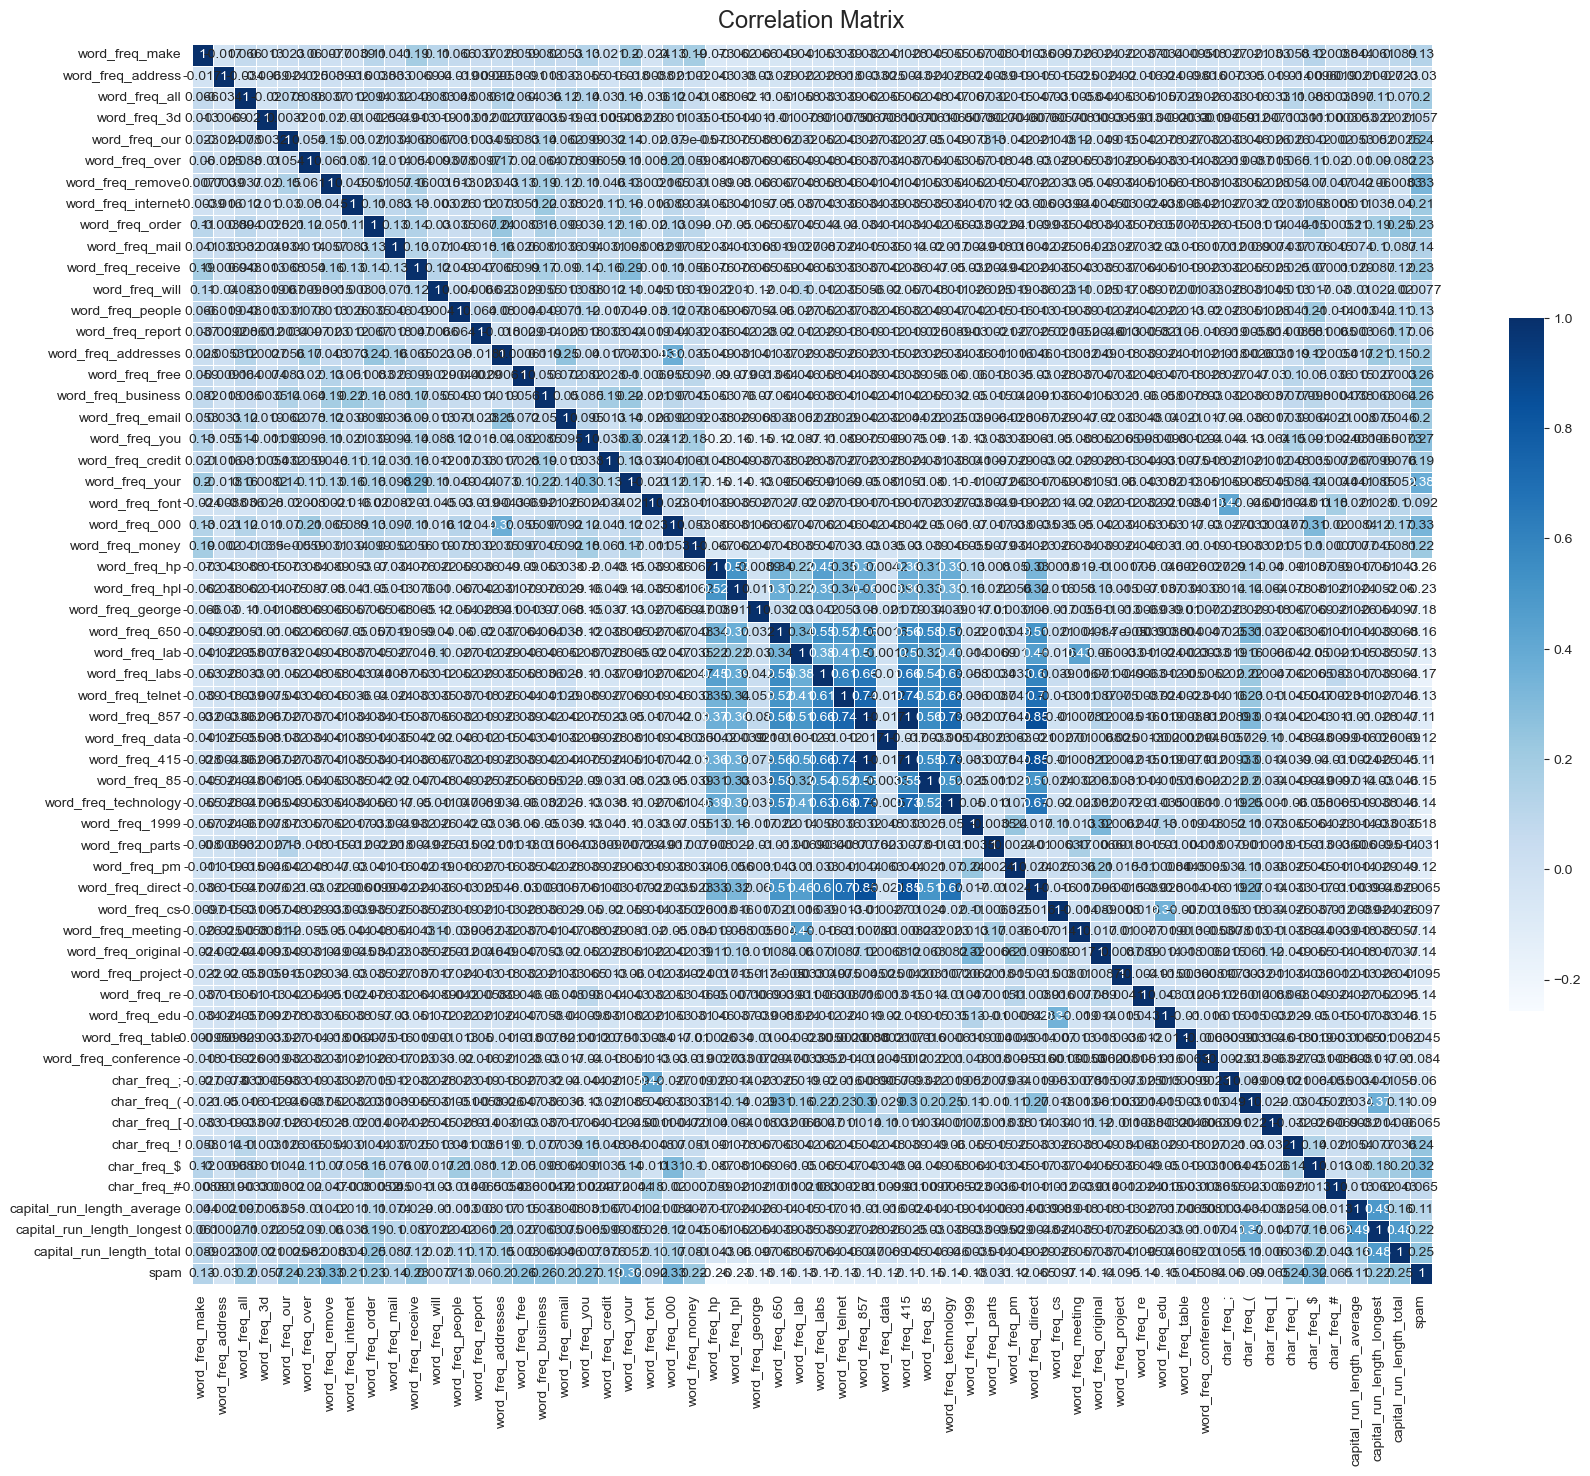

In [20]:
# constructing a heat map to visualize the correlation matrix between features
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap="Blues", annot=True, linewidths=0.5, square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix', fontsize=17, pad=12)
plt.show()

In [21]:
#check correlation of each variable
data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


# From EDA & Data Visualization:

*No missing Values

*All are continuous numerical values except for Spam column

*Slight imbalance in the dataset (Non-Spam(0) cases are more than Spam(1)) cases

*Mean of most features are clearly larger for Spam(1) cases and lower for Non-Spam(0) cases.
Most of the features have Outliers

*Most of the features are highly correlated, as shown by the correlation matrix. Consequently, we can remove some features during Feature Selection.

# 3. Data Preprocessing

# 1)Remove Outliers

In [22]:
# Local Outlier Factor (LOF) to identify potential outliers in the data and removing them based on a threshold.

from sklearn.neighbors import LocalOutlierFactor

# Creating an instance of the LocalOutlierFactor class and assigning it to the variable clf
clf = LocalOutlierFactor()

y_pred = clf.fit_predict(data) 
# Accessing the negative outlier factor of each data point and storing it in 'x_score'.
x_score = clf.negative_outlier_factor_
# Creating a new DataFrame outlier_score and storing the negative outlier factors in a 
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
# The 10th percentile of outlier scores is used as the threshold for identifying outliers, and all data points with outlier scores below this threshold are considered outliers.
threshold = np.quantile(x_score , .10) 
# Creating a boolean filter that selects the rows of the outlier_score DataFrame where the score is below the threshold.
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


threshold

-1.4430221448451512

In [23]:
# number of identified outliers
len(outlier_index)

460

In [24]:
# Dropping the rows corresponding to the outlier indices from the dataset
data.drop(outlier_index,inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4141 non-null   float64
 1   word_freq_address           4141 non-null   float64
 2   word_freq_all               4141 non-null   float64
 3   word_freq_3d                4141 non-null   float64
 4   word_freq_our               4141 non-null   float64
 5   word_freq_over              4141 non-null   float64
 6   word_freq_remove            4141 non-null   float64
 7   word_freq_internet          4141 non-null   float64
 8   word_freq_order             4141 non-null   float64
 9   word_freq_mail              4141 non-null   float64
 10  word_freq_receive           4141 non-null   float64
 11  word_freq_will              4141 non-null   float64
 12  word_freq_people            4141 non-null   float64
 13  word_freq_report            4141 

# 2)Handle Imbalanced Data

In [26]:
x1 = data.drop(["spam"], axis = 1)
y1 = data["spam"]

In [27]:
y1.value_counts()

0    2464
1    1677
Name: spam, dtype: int64

In [28]:
x1.shape

(4141, 57)

In [29]:
y1.shape

(4141,)

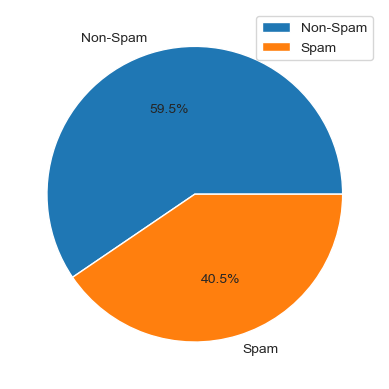

In [30]:
plt.pie(data['spam'].value_counts(),autopct="%1.1f%%",labels=['Non-Spam','Spam'])
plt.legend()
# creates a pie chart to show the proportion of unique values in the 'class' column

The Target Variable seems to be slightly imbalanced! 

# SMOTE Technique

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
# Synthetic Minority Over-sampling Technique (SMOTE) algorithm to the feature matrix 'x1' and target variable 'y1' using the 'SMOTE' function.
smote = SMOTE(random_state=42)

# The SMOTE algorithm generates synthetic samples for the minority class (in this case, the 'Spam' class), by creating new synthetic data points that are combinations of existing minority-class data points. The resulting new feature matrix and target variable are stored in 'x_smote' and 'y_smote', respectively.
x_smote, y_smote = smote.fit_resample(x1, y1)

Text(0, 0.5, 'Count')

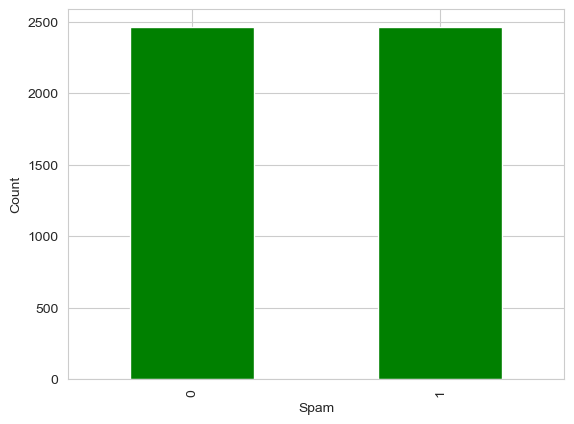

In [33]:
# SMOTE algorithm has generated synthetic data points for the minority class to balance the distribution of classes in the target variable
y_smote_counts = y_smote.value_counts().sort_index()
y_smote_counts.plot(kind='bar',color='green')
plt.xlabel("Spam")
plt.ylabel("Count")

In [34]:
x_smote.shape

(4928, 57)

In [35]:
y_smote.shape

(4928,)

# 4. Data Manipulation

# Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scalerstd = StandardScaler()
x = scalerstd.fit_transform(x_smote)

Standardization ensures that the data is on a common scale, making it easier to compare across different features or variables. It also makes the data more interpretable because the values are on a consistent scale. The scale of the input features influences the performance of machine learning algorithms such as k-nearest neighbors and support vector machines. Standardizing the data can help these algorithms perform better, especially when the features have different units or scales.

In [37]:
x.shape

(4928, 57)

In [38]:
x

array([[-0.39282148,  0.34971017,  0.67963469, ...,  0.01083298,
         0.16018827, -0.03303542],
       [ 0.33662992,  0.05646643,  0.39202493, ...,  0.23890643,
         0.60258222,  1.49742906],
       [-0.18440679, -0.17161204,  0.82343956, ...,  1.0294379 ,
         4.84956421,  4.00943144],
       ...,
       [ 1.10081709, -0.17161204, -0.63515278, ...,  0.23890643,
         0.66894132, -0.23505674],
       [ 0.59789467, -0.04244213,  0.09889265, ...,  1.25668126,
         2.30579896,  5.2195187 ],
       [ 1.77189027, -0.09238343,  0.68237929, ...,  0.01649714,
         0.41456479,  0.84239026]])

# 5. Predictive Modeling

# Splitting the data into training and testing sets

In [39]:
#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_smote,test_size=0.2,random_state = 2)

In [40]:
x_train.shape 

(3942, 57)

In [41]:
x_test.shape

(986, 57)

In [42]:
y_train.shape

(3942,)

In [43]:
y_test.shape

(986,)

# 1)K-Nearest Neighbours Classfier:

# Find good K value from error rate and training and test accuracy

In [44]:
from sklearn.neighbors import KNeighborsClassifier

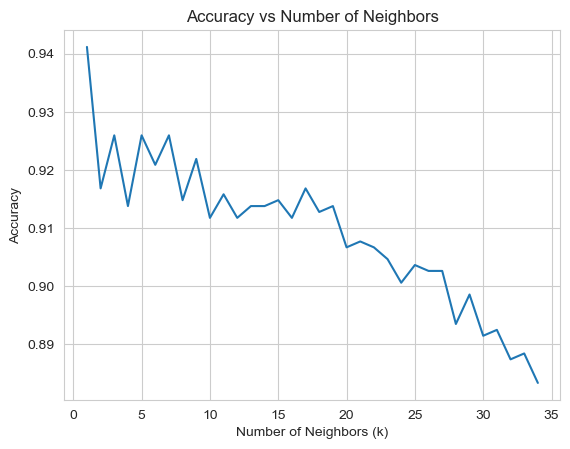

In [45]:
# Define range of k values to try
k_values = range(1, 35)

# Train and evaluate KNN model for each value of k
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    accuracies.append(accuracy)

# Plot accuracy vs k values
plt.plot(k_values, accuracies)
plt.title("Accuracy vs Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()

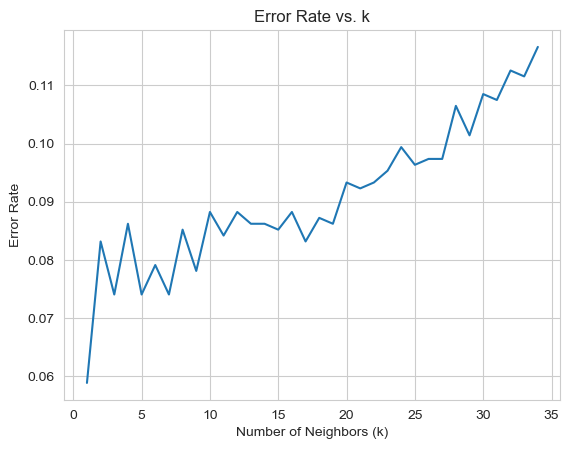

Best value of k: 1


In [46]:
# Create k-NN model for different values of k
k_values = range(1, 35)
error_rates = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)  # Call predict on the correct model
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)

# Plot error rate vs k values
plt.plot(k_values, error_rates)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k')
plt.show()

# Find the best value of k
best_k = k_values[np.argmin(error_rates)]
print("Best value of k:", best_k)

# GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Define parameter grid
param_grid = {'n_neighbors': range(1, 36),
              'weights': ['uniform', 'distance']}

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print results
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set accuracy: {:.2f}".format(grid_search.score(x_test, y_test)))

Best parameters:  {'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.94
Test set accuracy: 0.94


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [50]:
pred = knn.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
dictionary.append([accuracy, precision, recall, f1])

In [52]:
pred[233:239]

array([0, 1, 1, 0, 1, 0], dtype=int64)

In [53]:
y_test[233:239]

3689    0
1575    1
280     1
2223    0
4490    1
3607    0
Name: spam, dtype: int64

# Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm = confusion_matrix(y_test,pred)

In [56]:
class_names = ['Non-spam','Spam']

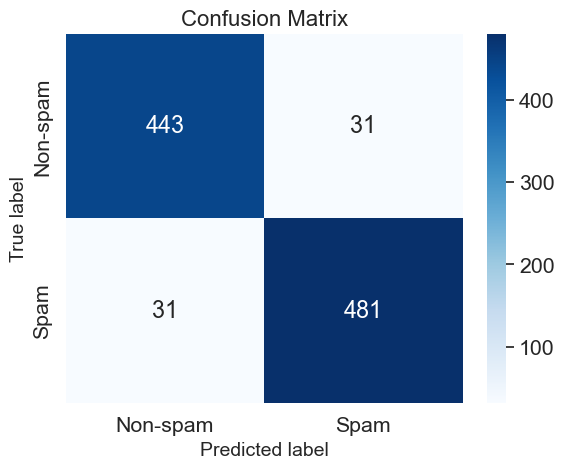

In [57]:
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names,)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification Report

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,pred))
print("KNN model accuracy_score on test:", accuracy_score(y_test,pred))
print("KNN model accuracy on test: {:.2f}%".format(accuracy_score(y_test,pred) * 100))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       474
           1       0.94      0.94      0.94       512

    accuracy                           0.94       986
   macro avg       0.94      0.94      0.94       986
weighted avg       0.94      0.94      0.94       986

KNN model accuracy_score on test: 0.9371196754563894
KNN model accuracy on test: 93.71%


# 2) Decisoin Tree Classfier:

In [60]:
# Creating the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2)

In [61]:
# Define parameter grid
param_grid = {'max_depth': range(1, 11),
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(1, 6),
              'criterion': ['gini', 'entropy']}

# Create DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2)

# Perform grid search Tuning hyperparameters by using 5 fold cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print results
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set accuracy: {:.2f}".format(grid_search.score(x_test, y_test)))

Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best cross-validation score: 0.93
Test set accuracy: 0.92


In [62]:
# Create DecisionTreeClassifier with best hyperparameters
tree = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=1, min_samples_split=3)

# Train the model on the training set
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=3)

In [63]:
pred = tree.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
dictionary.append([accuracy, precision, recall, f1])

# Confusion Matrix

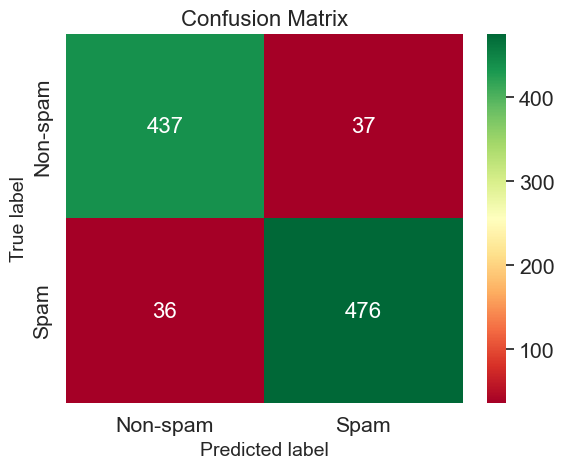

In [65]:
cm = confusion_matrix(y_test,pred)
class_names_t = ['Non-spam','Spam']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='RdYlGn', fmt='d', xticklabels=class_names_t, yticklabels=class_names_t, annot_kws={"fontsize":16})
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Classification Report

In [66]:

# Print the classification report
print(classification_report(y_test,pred))

# Print the accuracy score
accuracy = accuracy_score(y_test,pred)
print("DecisionTreeClassifier model accuracy_score on test:", accuracy)
print("DecisionTreeClassifier model accuracy on test: {:.2f}%".format(accuracy * 100))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       474
           1       0.93      0.93      0.93       512

    accuracy                           0.93       986
   macro avg       0.93      0.93      0.93       986
weighted avg       0.93      0.93      0.93       986

DecisionTreeClassifier model accuracy_score on test: 0.9259634888438134
DecisionTreeClassifier model accuracy on test: 92.60%


[[0.9371196754563894, 0.939453125, 0.939453125, 0.939453125], [0.9259634888438134, 0.9278752436647173, 0.9296875, 0.9287804878048781]]


<AxesSubplot: >

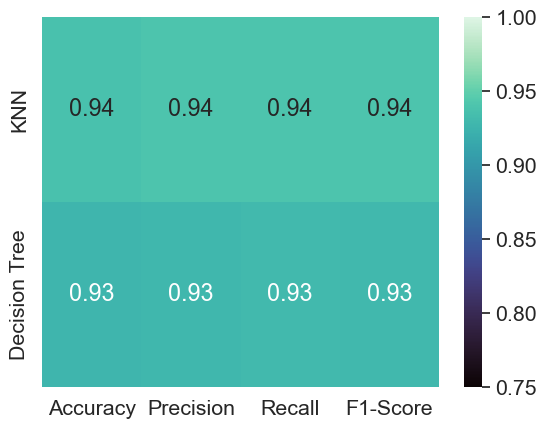

In [68]:
# Adding Model Names
modelNames = ['KNN', 'Decision Tree']
evalMetrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
print(dictionary)
# create a pandas DataFrame
df = pd.DataFrame(dictionary, columns=evalMetrics, index=modelNames)

# set the color palette for the heatmap
cmap = sns.color_palette("rocket_r", as_cmap=True)

# plot the DataFrame as a heatmap using Seaborn
sns.heatmap(df, annot=True, vmin=0.75, vmax=1, cmap='mako', fmt='.2f')
